# CSE-221710308021-Aniruddh

In [7]:
import pandas as pd   
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
pd.__version__

'1.0.3'

In [9]:
sns.__version__

'0.10.1'

In [10]:
np.__version__

'1.18.2'

In [11]:
import matplotlib
matplotlib.__version__

'3.2.1'

In [12]:
df=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/upvotes.csv")
df

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


In [13]:
print(df.columns)
print("No. of rows=",len(df))
print("No. of Cols=",len(df.axes[1]))

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')
No. of rows= 330045
No. of Cols= 7


In [14]:
print("No. of Categorical Columns:",len(df.columns[df.dtypes=='object']))
print("No. of Numericals Columns:",len(df.columns[df.dtypes!='object']))

No. of Categorical Columns: 1
No. of Numericals Columns: 6


## draw a relplot by palcing views on y and upvotes on x

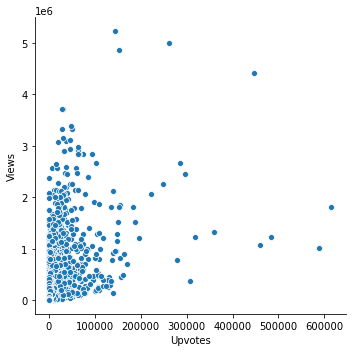

In [15]:
# draw the plot using data argument
sns.relplot("Upvotes","Views",data=df)

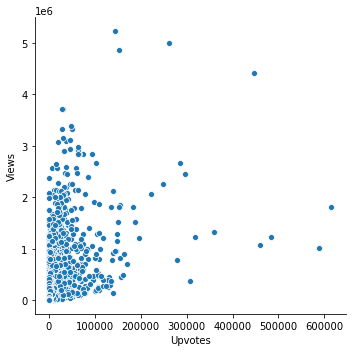

In [57]:
# draw the plot without using data argument
sns.relplot('Upvotes','Views',None,None,None,df)

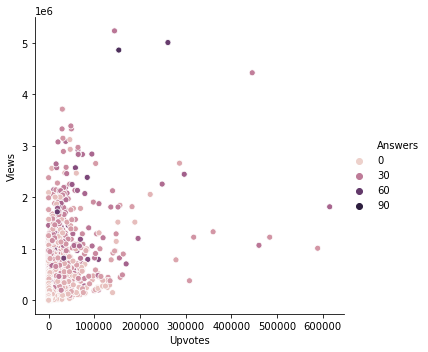

In [58]:
# check it with one numerical column as hue
sns.relplot("Upvotes","Views",data=df,hue='Answers')

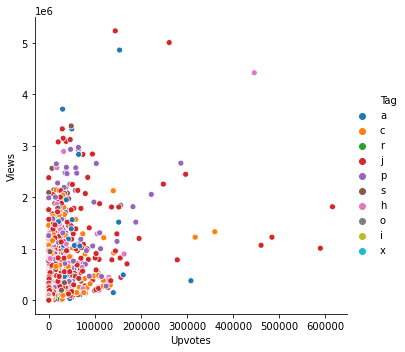

In [19]:
#check it with one categorical column as hue
sns.relplot("Upvotes","Views",data=df,hue='Tag')

## observations:


In [22]:
df['Tag'].unique()
# For hue="Tag" is we have only 10 unique values so it used all objects in hue

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

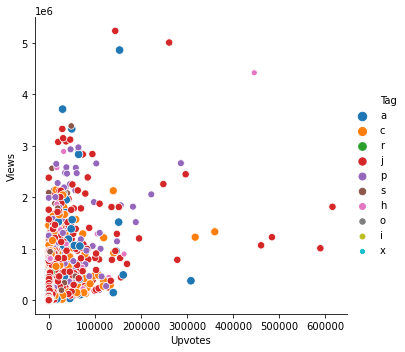

In [23]:
#Modify the above plot using any of the parameters size,style,col
sns.relplot("Upvotes","Views",data=df,hue='Tag',size='Tag')

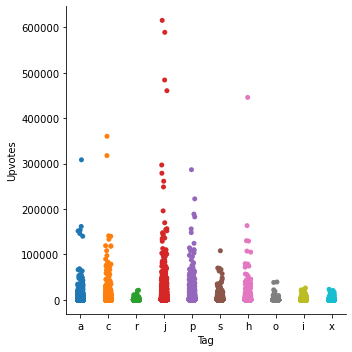

In [24]:
# Draw the cat plot by taking tag on xaxis and upvotes on yaxis
sns.catplot("Tag","Upvotes",data=df)

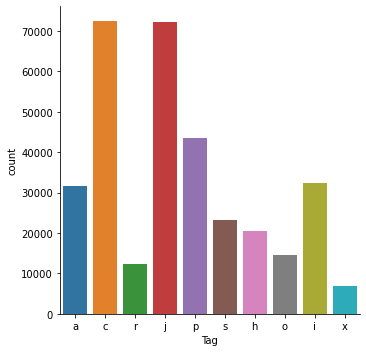

In [25]:
# Draw the suitable plot to display How many questions are there for each Tag
sns.catplot("Tag",data=df,kind='count')

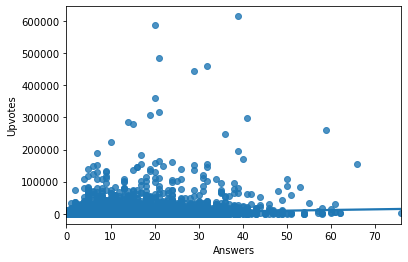

In [26]:
# Draw the suitable plot which will provide estimated line fit for the Answers and Upvotes
sns.regplot("Answers","Upvotes",data=df)

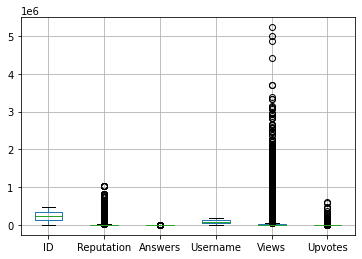

In [27]:
# Draw the boxplot for all the numerical columns
df.boxplot(column=['ID','Reputation','Answers','Username','Views','Upvotes'])

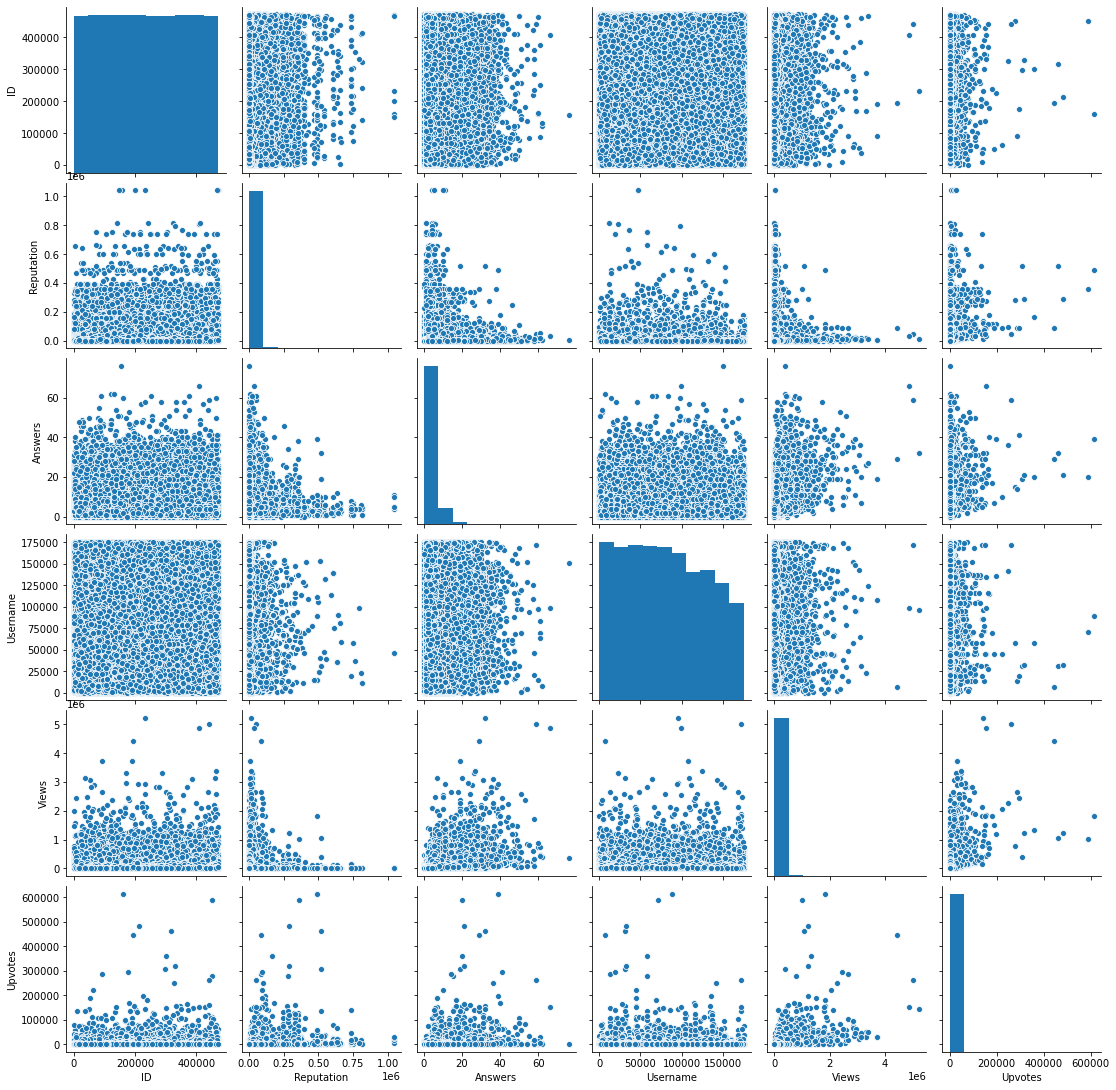

In [28]:
# Draw the pairplot
sns.pairplot(df)

In [29]:
# Caluculate the correlation among all the possible numerical columns. Represnt those values using a suitable graph
df.corr()

,ID,Reputation,Answers,Username,Views,Upvotes
ID,1.000000,0.008546,0.017448,0.000628,0.017400,0.006328
Reputation,0.008546,1.000000,0.066504,-0.041019,0.036455,0.266710
Answers,0.017448,0.066504,1.000000,-0.012197,0.498642,0.202033
Username,0.000628,-0.041019,-0.012197,1.000000,0.002306,-0.011970
Views,0.017400,0.036455,0.498642,0.002306,1.000000,0.437336
Upvotes,0.006328,0.266710,0.202033,-0.011970,0.437336,1.000000


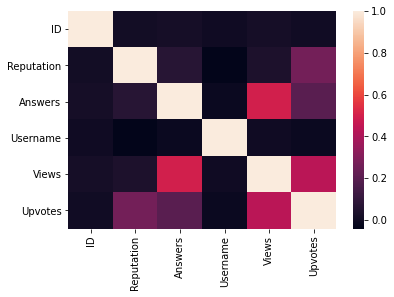

In [30]:
sns.heatmap(df.corr())

In [31]:
# Get the data with tag 'a' in a new dataframe with name df_taga
df_taga=df[df['Tag'].str[0] == 'a']
print(df_taga)

            ID Tag  Reputation  Answers  Username    Views  Upvotes
0        52664   a      3942.0      2.0    155623   7855.0     42.0
1       327662   a     26046.0     12.0     21781  55801.0   1175.0
3        96996   a       264.0      3.0    168793  27064.0      9.0
30      106895   a       347.0      3.0    154557  22195.0      8.0
33      292364   a      9051.0      2.0     58930  46305.0    363.0
...        ...  ..         ...      ...       ...      ...      ...
330018  343134   a      4503.0      6.0    169019  26688.0    140.0
330023  410941   a        28.0      5.0     99082   6004.0     10.0
330030  202255   a       476.0      3.0    106383  11537.0     13.0
330031  106211   a      1836.0      1.0      8874   4010.0     12.0
330034  468835   a      3165.0     15.0     98736  63005.0    422.0

[31695 rows x 7 columns]


## With the dataframe(df_taga) try any three plots We discussed either in matplotlib or seaborn

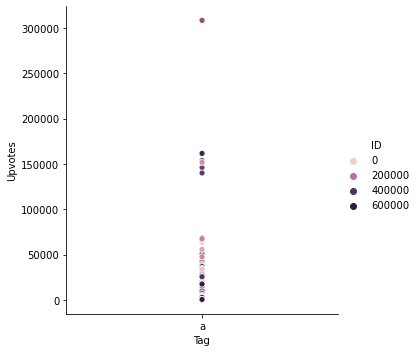

In [32]:
sns.relplot("Tag","Upvotes",data=df_taga,hue='ID')

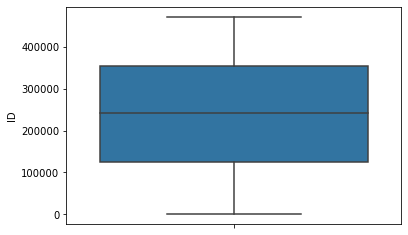

In [33]:
sns.boxplot(y=df_taga['ID'])

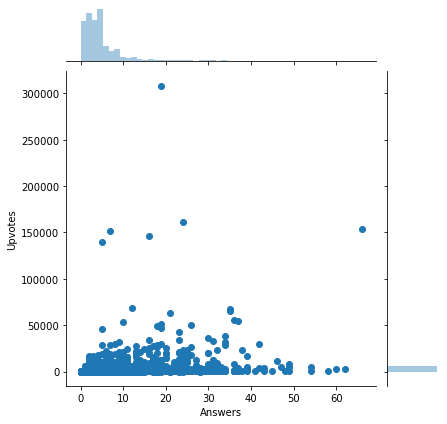

In [34]:
sns.jointplot('Answers','Upvotes',data=df_taga)

# Create a new column with name 'Ans' using Answers column in the df.
- make the values which are 0 as Unanswered
- make the values which are in 1-20 range as 'Twenty'
- make the values which are in 21-40 range as 'Forty'
- make the values which are in 41-60 range as 'Sixty'
- make the values which are in 61-80 range as 'Eighty'
- Here You are creating a categorical column from numerical ccolumn

In [36]:
df['Ans'] = df.apply(lambda _: '', axis=1)
df

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Ans
0,52664,a,3942.0,2.0,155623,7855.0,42.0,
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,
2,468453,c,1358.0,4.0,56177,8067.0,60.0,
3,96996,a,264.0,3.0,168793,27064.0,9.0,
4,131465,c,4271.0,4.0,112223,13986.0,83.0,
...,...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0,
330041,253800,c,1649.0,2.0,76730,23319.0,73.0,
330042,210756,c,6178.0,2.0,91701,2453.0,15.0,
330043,56089,j,89.0,2.0,80245,2107.0,3.0,


In [37]:
df.loc[(df['Answers'] >=1) & (df['Answers'] <= 20), 'Ans'] = 'Twenty'
df.loc[(df['Answers']==0),'Ans'] = 'Unanswered'
df.loc[(df['Answers'] >=21) & (df['Answers'] <= 40), 'Ans'] = 'Forty'
df.loc[(df['Answers'] >=41) & (df['Answers'] <= 60), 'Ans'] = 'Sixty'
df.loc[(df['Answers'] >=61) & (df['Answers'] <= 80), 'Ans'] = 'Eighty'
df

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Ans
0,52664,a,3942.0,2.0,155623,7855.0,42.0,Twenty
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,Twenty
2,468453,c,1358.0,4.0,56177,8067.0,60.0,Twenty
3,96996,a,264.0,3.0,168793,27064.0,9.0,Twenty
4,131465,c,4271.0,4.0,112223,13986.0,83.0,Twenty
...,...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0,Twenty
330041,253800,c,1649.0,2.0,76730,23319.0,73.0,Twenty
330042,210756,c,6178.0,2.0,91701,2453.0,15.0,Twenty
330043,56089,j,89.0,2.0,80245,2107.0,3.0,Twenty


# Draw a boxplot by taking Ans column on Xaxis and Upvotes on Y axis

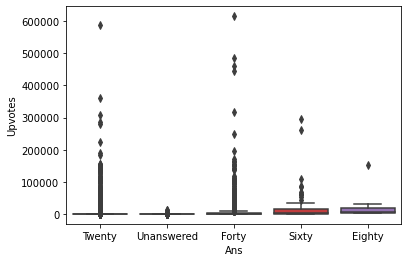

In [59]:
# by boxplot
sns.boxplot(x="Ans", y="Upvotes", data=df)

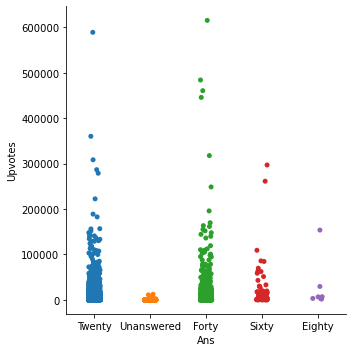

In [60]:
# by catplot
sns.catplot("Ans","Upvotes",data=df)